<a href="https://colab.research.google.com/github/kietazkid/K/blob/main/10_Disk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Khai báo thư viện 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, load_img, img_to_array

In [ ]:
#Preprocessing để Training 
# Load ảnh, chia loại, định lại cỡ ảnh 30x40, rescale ảnh và định dạng ảnh về binary
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True
                                  )
train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/10_disk/Training', 
                                                 target_size = (30,40), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')

Found 170 images belonging to 10 classes.


In [ ]:
# Load ảnh, chia loại, định lại cỡ ảnh 30x40, rescale ảnh và định dạng ảnh về binary
test_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True
                                  )
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/10_disk/Test', 
                                                
                                                 target_size = (30,40), 
                                                 batch_size = 32, 
                                                class_mode = 'categorical')

Found 33 images belonging to 10 classes.


In [ ]:

training_set.class_indices

{'banhmi': 0,
 'banhxeo': 1,
 'che': 2,
 'comtam': 3,
 'duasap': 4,
 'goicuon': 5,
 'miquang': 6,
 'pate': 7,
 'pho': 8,
 'xoi': 9}

In [ ]:
test_set.class_indices

{'banhmi': 0,
 'banhxeo': 1,
 'che': 2,
 'comtam': 3,
 'duasap': 4,
 'goicuon': 5,
 'miquang': 6,
 'pate': 7,
 'pho': 8,
 'xoi': 9}

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization
import keras.backend as K
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam

In [ ]:
# Tạo model
model = Sequential()
#Thêm lớp chuyển đổi
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=[30,40,3],padding='same')) #3 kênh màu RGB
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
#Pooling
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Tích chập lớp thứ 2
model.add(Conv2D(64,(3,3), activation = 'relu',padding='same'))
model.add(Conv2D(64,(3,3), activation = 'relu',padding='same'))
model.add(Dropout( 0.1))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))

model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Làm phẳng
model.add(Flatten())
  # ANN Layer
#Connect
model.add(Dense(128, activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(Dense(32, activation='relu'))
model.add(LeakyReLU(alpha = 0.1))

#Output
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 40, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 40, 32)        9248      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 20, 64)        36928     
                                                        

In [ ]:
# Thiết lập thông số
from keras.optimizers import Adam
model.compile( loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])

In [ ]:

# Huấn luyện
# fit the model
# Run the cell. It will take some time to execute
a = model.fit_generator( training_set, validation_data=test_set, epochs=80, steps_per_epoch=len(training_set), 
                        validation_steps=len(test_set)
)

<ipython-input-10-396911b85743>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  a = model.fit_generator( training_set, validation_data=test_set, epochs=80, steps_per_epoch=len(training_set),


Epoch 1/80
6/6 [==============================] - 50s 8s/step - loss: 2.3165 - accuracy: 0.0824 - val_loss: 2.2955 - val_accuracy: 0.1818
Epoch 2/80
6/6 [==============================] - 3s 436ms/step - loss: 2.2754 - accuracy: 0.1118 - val_loss: 2.1873 - val_accuracy: 0.1515
Epoch 3/80
6/6 [==============================] - 4s 600ms/step - loss: 2.1543 - accuracy: 0.1647 - val_loss: 2.0493 - val_accuracy: 0.2121
Epoch 4/80
6/6 [==============================] - 2s 347ms/step - loss: 2.1208 - accuracy: 0.2118 - val_loss: 2.2111 - val_accuracy: 0.2121
Epoch 5/80
6/6 [==============================] - 2s 359ms/step - loss: 2.1148 - accuracy: 0.1647 - val_loss: 2.0408 - val_accuracy: 0.1818
Epoch 6/80
6/6 [==============================] - 2s 357ms/step - loss: 2.0333 - accuracy: 0.2000 - val_loss: 1.9779 - val_accuracy: 0.2121
Epoch 7/80
6/6 [==============================] - 2s 335ms/step - loss: 1.9423 - accuracy: 0.2118 - val_loss: 2.1817 - val_accuracy: 0.2424
Epoch 8/80
6/6 [======

In [ ]:
model.evaluate(test_set)

2/2 [==============================] - 1s 20ms/step - loss: 2.8667 - accuracy: 0.6667


[2.8666787147521973, 0.6666666865348816]

In [ ]:
y_pred = model.predict_generator(test_set)
y_pred_class = y_pred > 0.5
y_pred_class

<ipython-input-12-467eccc537b7>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_set)


array([[False, False, False, False,  True, False, False, False, False,
        False],
       [False, False, False,  True, False, False, False, False, False,
        False],
       [False, False,  True, False, False, False, False, False, False,
        False],
       [False, False, False, False,  True, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False,  True,
        False],
       [False, False,  True, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False,  True, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
         True],
       [False, False, False, False, False,  True, False, False, False,
        False],
       [False, False, False, False, False, 

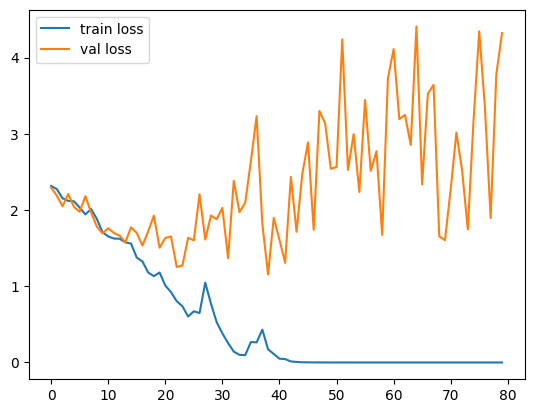

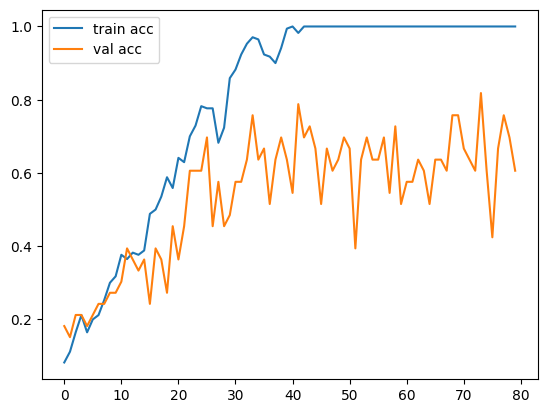

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(a.history['loss'], label='train loss')
plt.plot(a.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(a.history['accuracy'], label='train acc')
plt.plot(a.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/10_disk/Valid/model_inception.h5')

In [ ]:

from tensorflow.keras.preprocessing import image
model=load_model('/content/drive/MyDrive/10_disk/Valid/model_inception.h5')
model

In [ ]:
import os
os.chdir('/content/drive/MyDrive/10_disk/Valid')

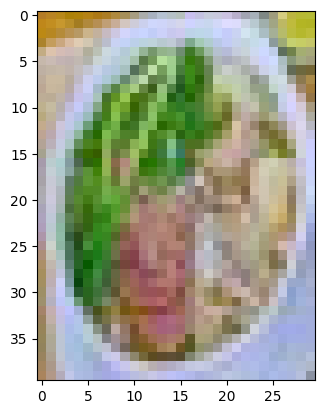

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical, load_img, img_to_array
img_data = load_img('/content/drive/MyDrive/10_disk/Valid/pho (18)_11zon.jpg')
img_data = img_to_array(img_data)
plt.imshow(img_data/255)

In [ ]:
import numpy as np
from keras.preprocessing import image
while 1 :
 ch = input('Chọn' ' image : ')
 if (ch=='-'):
     break
 else:
   try: 
     test_image = load_img("/content/drive/MyDrive/10_disk/Valid/{}.jpg".format(ch),
                             target_size=(30,40)) #Scale
     test_image = img_to_array(test_image)
     plt.imshow(test_image/255)
     test_image = np.expand_dims(test_image,axis=0)
     result = model.predict(test_image)
     training_set.class_indices
     print(result)
     x=0
     c=0
     i=0
     while (i<10):
       if result[0][i]>=x:
         x=result[0][i]
         c=i
        
       i=i+1
     if (x==0 and c==9) :
         c=10
     if c == 0:
       prediction = 'Banhmi'
     elif c == 1:
       prediction = 'Banhxeo'
     elif c == 2:
       prediction = 'BunboHue'
     elif c == 3:
       prediction = 'Buncha'
     elif c == 4:
       prediction = 'Caolau'
     elif c==5:
       prediction ='Chaca'
     elif c == 6:
       prediction = 'Comtam'
     elif c == 7:
       prediction = 'Goicuon'
     elif c == 8:
       prediction = 'Phobo'
     elif c==9:
       prediction ='Miquang'
           
     print(prediction)
   except:
      print('Tên của hình ảnh không tồn tại '  )

Tên của hình ảnh không tồn tại 
Tên của hình ảnh không tồn tại 
